# Pivot Tables

### MoviesLens data set: Question: How do men and women rate the same movie?

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Read three two data files

In [15]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv('u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# u.item has a large number of fields.  Lets use only two.
# Note the use of 'usecols'

m_cols = ['movie_id', 'title']
movies = pd.read_csv('u.item', sep='|', names=m_cols, usecols=range(2),
                     encoding='latin-1')

# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
data = pd.merge(users, movie_ratings)

Always good to start off by examining the data

In [16]:
data.head()

,user_id,age,gender,occupation,zip_code,movie_id,title,rating,unix_timestamp
0,1,24,M,technician,85711,1,Toy Story (1995),5,874965758
1,1,24,M,technician,85711,2,GoldenEye (1995),3,876893171
2,1,24,M,technician,85711,3,Four Rooms (1995),4,878542960
3,1,24,M,technician,85711,4,Get Shorty (1995),3,876893119
4,1,24,M,technician,85711,5,Copycat (1995),3,889751712


### [Q] What are the top 10 movies that have the most number of ratings?

#### Approach 1: 
- Form groups based on title
- find the size of each group
- sort the resultant Series with .sort_values

In [17]:
data.groupby('title').size().sort_values(ascending=False)[:10]

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
dtype: int64

#### Approach 2:  Use Pandas' .value_counts :-)

In [18]:
data['title'].value_counts()[:10]

Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: title, dtype: int64

### [Q] What is the average rating for each movie?  Which movies are rated the highest? 

In [19]:
stats=data.groupby('title').apply(lambda df: (len(df), df['rating'].mean()))
stats.head()

title
'Til There Was You (1997)      (9, 2.33333333333)
1-900 (1994)                             (5, 2.6)
101 Dalmatians (1996)        (109, 2.90825688073)
12 Angry Men (1957)                  (125, 4.344)
187 (1997)                     (41, 3.0243902439)
dtype: object

### [Q] Perform the same calculation, but this time only for movies that have been rated at least 100 times

In [20]:
atleast_100 = stats[stats.apply(lambda v: v[0]>100)]
atleast_100.head()
#len(atleast_100)

title
101 Dalmatians (1996)           (109, 2.90825688073)
12 Angry Men (1957)                     (125, 4.344)
2001: A Space Odyssey (1968)    (259, 3.96911196911)
Absolute Power (1997)           (127, 3.37007874016)
Abyss, The (1989)               (151, 3.58940397351)
dtype: object

In [21]:
data.head()

,user_id,age,gender,occupation,zip_code,movie_id,title,rating,unix_timestamp
0,1,24,M,technician,85711,1,Toy Story (1995),5,874965758
1,1,24,M,technician,85711,2,GoldenEye (1995),3,876893171
2,1,24,M,technician,85711,3,Four Rooms (1995),4,878542960
3,1,24,M,technician,85711,4,Get Shorty (1995),3,876893119
4,1,24,M,technician,85711,5,Copycat (1995),3,889751712


### Determine the 50 movies that have been reviewed the most
(we've already done it)

In [22]:
most_50 = data['title'].value_counts()[:50]
#most_50 = data.groupby('movie_id').size().sort_values(ascending=False)[:50]
most_50.head()

Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: title, dtype: int64

## Pivot Tables

In [23]:
pv = data.pivot_table( index='title', columns='gender', values='rating')
pv.head()

gender,F,M
title,,
'Til There Was You (1997),2.200000,2.500000
1-900 (1994),1.000000,3.000000
101 Dalmatians (1996),3.116279,2.772727
12 Angry Men (1957),4.269231,4.363636
187 (1997),3.500000,2.870968


In [24]:
pv['diff'] = pv['M'] - pv['F']
pv.head()

gender,F,M,diff
title,,,
'Til There Was You (1997),2.200000,2.500000,0.300000
1-900 (1994),1.000000,3.000000,2.000000
101 Dalmatians (1996),3.116279,2.772727,-0.343552
12 Angry Men (1957),4.269231,4.363636,0.094406
187 (1997),3.500000,2.870968,-0.629032


We need to filter the pivot table using only the movies in `most_50`.  This can be done in two ways.

**Approach 1**

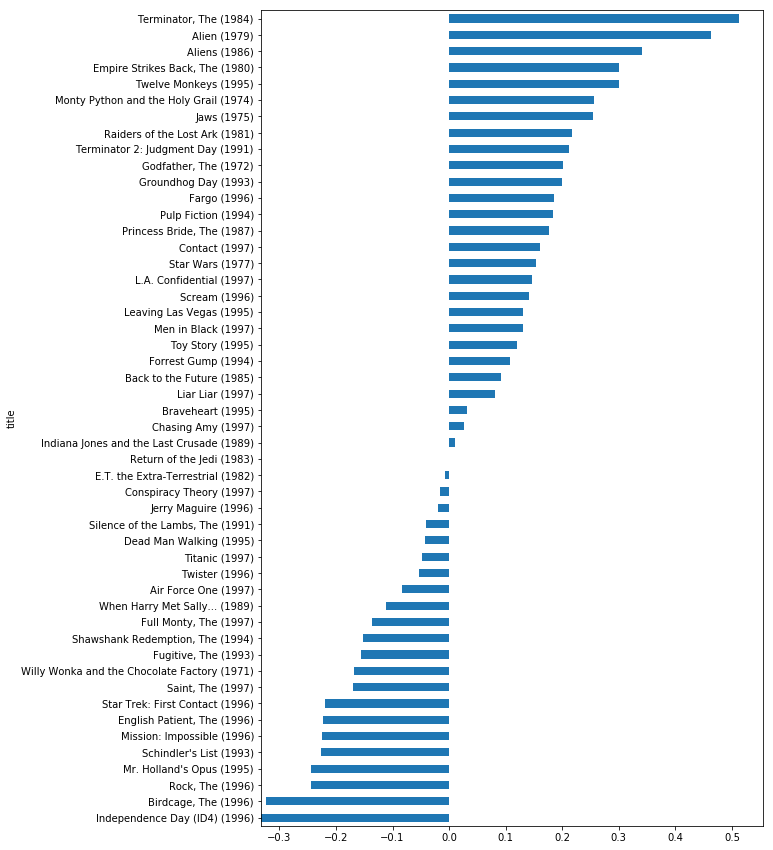

In [25]:
filt = pv.loc[pv.index.isin(most_50.index),'diff']
filt.sort_values().plot(kind='barh', figsize=[9,15])


**Aproach 2**

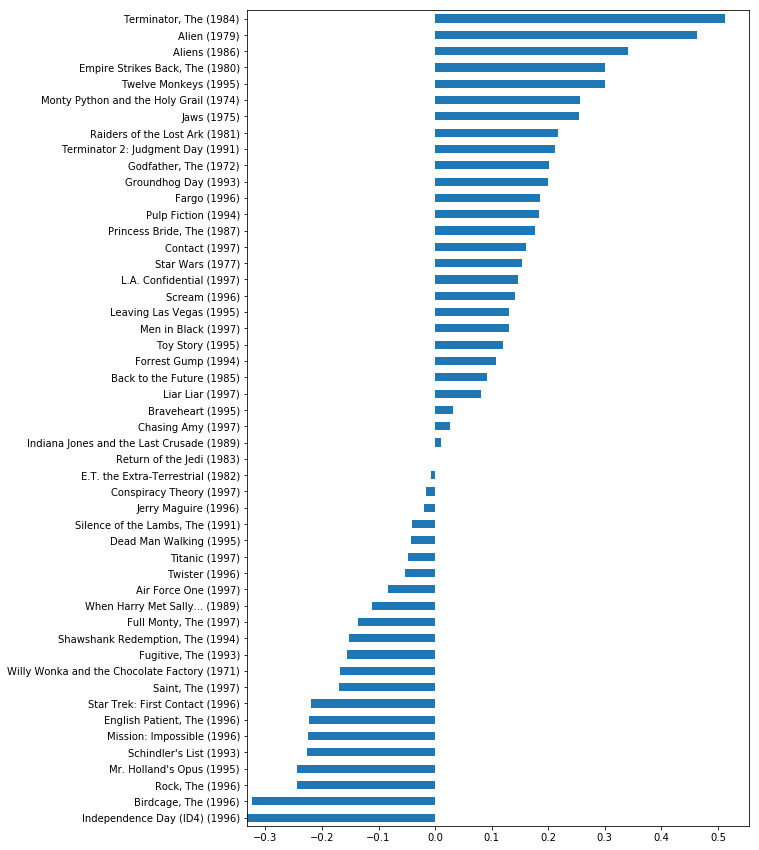

In [26]:
filt = pv.loc[most_50.index,'diff']
filt.sort_values().plot(kind='barh', figsize=[9,15])